# Monte Carlo Simulation Example with NumPy
Based on a problem defined by Anthony Sun (http://www.geocities.com/WallStreet/9245/vba12.htm used originally with permission.  The link is no longer live, but I include it for completeness.

A firm is considering producing and selling a new product under a pure/perfect competition market and the firm wants to know the probability distribution for the profit associated with this product.  The total profit is given by the equation:

$TP=(Q \times P)-(Q \times V+F)$

where $TP$ is the total profit, $Q$ is the quantity sold, $P$ is the selling price, $V$ is the variable cost, and $F$ is the fixed cost.  Since the firm is *predicting* what will happen if they produce the product, some of the profit components are uncertain.  In particular, $Q$, $P$, and $V$ are estimated to be *random variables* with the following distributions:

  * $Q$: uniform(8000, 12000)
  * $P$: normal(10, 3)
  * $V$: normal(7, 2)

$F$ is fixed at 5000.

The goal is to use Monte Carlo simulation to estimate various descriptive statistics about the total profit associated with the product (if the project were undertaken) and to ultimately proivde information to aid a decision-maker in deciding whether or not to pursue the project.

In [1]:
# Some setup
import numpy as np
import matplotlib.pyplot as plt

## Simple Vector Version

Expected value from 1,000,000 replications: 25,032.55


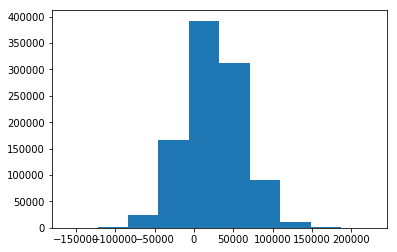

In [10]:
# Simple vector version using NumPy
# Specify the number of observations/replications to perform
obs = 1000000
# generate the input vectors
price = np.random.normal(10, 3, obs)
marginal = np.random.normal(7, 2, obs)
demand = np.random.uniform(8000, 12000, obs)
# compute the expected profit for each replication (using vector operations)
tp = demand * (price - marginal) - 5000
# basic display of results
print("Expected value from {:,d} replications: {:,.2f}".format(obs, np.mean(tp)))
plt.figure()
plt.hist(tp)
plt.show()

In [11]:
# Descriptive Statistics
print("          Expected profit: ${:10,.2f}".format(tp.mean()))
print("                Std. Dev.: ${:10,.2f}".format(tp.std()))
print("          25th Percentile: ${:10,.2f}".format(np.percentile(tp, 25)))
print("          75th Percentile: ${:10,.2f}".format(np.percentile(tp, 75)))
print("     Prob. of losing money: {:.3f}".format(np.sum(tp < 0)/obs))
print("Prob. of making > $100,000: {:.3f}".format(np.sum(tp > 100000)/obs))


          Expected profit: $ 25,032.55
                Std. Dev.: $ 36,457.60
          25th Percentile: $    600.08
          75th Percentile: $ 49,011.13
     Prob. of losing money: 0.245
Prob. of making > $100,000: 0.022


## Aggregate the Individual Arrays into a Single Experiment

In [12]:
# Create 4 single-column arrays
p = price.reshape(obs,1)
m = marginal.reshape(obs,1)
d = demand.reshape(obs,1)
pr = tp.reshape(obs,1)
p.shape, m.shape, d.shape, pr.shape

((1000000, 1), (1000000, 1), (1000000, 1), (1000000, 1))

In [ ]:
# Create 4 single-column arrays - A different way to do the reshape operation
#p = price[:,np.newaxis]
#m = marginal[:, np.newaxis]
#d = demand[:, np.newaxis]
#pr = tp[:, np.newaxis]
#p.shape, m.shape, d.shape, pr.shape

In [13]:
# Concatenate the four into a matrix -- each row represents a replication
a = np.concatenate([p, m, d, pr], axis=1)
a.shape

(1000000, 4)

In [14]:
# mean of each variable
a.mean(axis=0)

array([9.99992382e+00, 6.99767901e+00, 1.00006194e+04, 2.50325526e+04])